# <div align="center">**MAP (Maximum A Posteriori)**</div>

---

## **1. What is MAP?**
**Maximum A Posteriori (MAP)** is a statistical method used to estimate an unknown parameter $ \theta $ by maximizing the posterior probability $ P(\theta | X) $, where $ X $ represents the observed data. MAP is widely used in Bayesian inference and combines prior knowledge about the parameter with the likelihood of the observed data.

---

## **2. Maximum A Posteriori (MAP) Estimation**

The MAP estimate is given by:

$$
\hat{\theta}_{MAP} = \underset{\theta}{\text{argmax}} \, P(\theta | X)
$$

Using **Bayes' theorem**:

$$
P(\theta | X) = \frac{P(X | \theta) P(\theta)}{P(X)}
$$

Since $ P(X) $ is independent of $ \theta $, the MAP estimate simplifies to:

$$
\hat{\theta}_{MAP} = \underset{\theta}{\text{argmax}} \, P(X | \theta) P(\theta)
$$

Alternatively, taking the logarithm:

$$
\hat{\theta}_{MAP} = \underset{\theta}{\text{argmax}} \, \left[ \log P(X | \theta) + \log P(\theta) \right]
$$

This shows that MAP estimation incorporates both the likelihood $( P(X | \theta) $) and the prior $( P(\theta) $), balancing observed data with prior knowledge.

---

### **3. Key Concepts**

1. **Prior ($ P(\theta) $)**: 
- Represents prior knowledge or belief about the parameter ($ \theta $) before observing the data.

2. **Likelihood ($ P(X | \theta) $)**:
- Represents the probability of observing the data ($ X $) given the parameter ($ \theta $).

3. **Posterior ($ P(\theta | X) $)**: 
- Combines the prior and likelihood to update the belief about ($ \theta $) after observing the data.

4. **MAP vs MLE**:
   - **Maximum Likelihood Estimation (MLE)** maximizes only the likelihood ($ P(X | \theta) $), ignoring the prior.
   - **MAP** incorporates both the likelihood and the prior, making it more robust when prior knowledge is available.


### **4. Python Implementation**

Below is the Python implementation of MAP estimation using a simple Gaussian example:

---

#### **4.1 Import Required Libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### **4.2 Define the Prior**

In [2]:
def prior(theta, mu=0, sigma=1):
    return norm.pdf(theta, loc=mu, scale=sigma)

#### **4.3 Define the Likelihood**

In [3]:
def likelihood(data, theta):
    return np.prod(norm.pdf(data, loc=theta, scale=1))

#### **4.4 Define the Posterior**

In [4]:
def posterior(data, theta, mu=0, sigma=1):
    return likelihood(data, theta) * prior(theta, mu, sigma)

#### **4.5 Generate Synthetic Data**

In [5]:
np.random.seed(42)
data = np.random.normal(loc=2, scale=1, size=10)  # Data with true mean = 2
print("Data:", data)

Data: [2.49671415 1.8617357  2.64768854 3.52302986 1.76584663 1.76586304
 3.57921282 2.76743473 1.53052561 2.54256004]


#### **4.6 Perform MAP Estimation**

In [6]:
theta_values = np.linspace(-1, 5, 1000)  
posterior_values = [posterior(data, theta) for theta in theta_values]

theta_map = theta_values[np.argmax(posterior_values)]
print(f"MAP Estimate of Theta: {theta_map:.4f}")

MAP Estimate of Theta: 2.2252


#### **3.7 Visualize the Results**

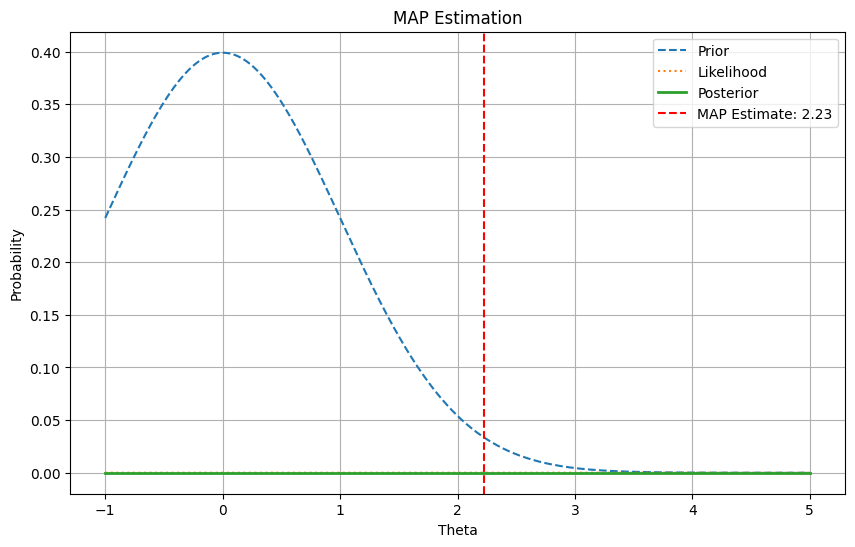

In [7]:
# Visualize the Prior, Likelihood, and Posterior
plt.figure(figsize=(10, 6))

# Plot the Prior
plt.plot(theta_values, [prior(theta) for theta in theta_values], label="Prior", linestyle="--")

# Plot the Likelihood
plt.plot(theta_values, [likelihood(data, theta) for theta in theta_values], label="Likelihood", linestyle=":")

# Plot the Posterior
plt.plot(theta_values, posterior_values, label="Posterior", linewidth=2)

# Highlight the MAP Estimate
plt.axvline(theta_map, color="red", linestyle="--", label=f"MAP Estimate: {theta_map:.2f}")

plt.title("MAP Estimation")
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

### **5. Applications of MAP**
1. **Bayesian Machine Learning**:
   - MAP is used in Bayesian models to estimate parameters.
2. **Natural Language Processing**:
   - MAP is applied in tasks like spam filtering and text classification.
3. **Computer Vision**:
   - MAP is used in image denoising and segmentation.
4. **Robotics**:
   - MAP is applied in localization and mapping (SLAM).

---

### **6. Summary**
- **MAP** combines prior knowledge and observed data to estimate parameters.
- It is more robust than MLE when prior knowledge is available or when the dataset is small.
- MAP is widely used in Bayesian inference and machine learning applications.


### **7. MAP vs MLE**
$$
\begin{array}{|l|l|l|}
\hline
\textbf{Aspect} & \textbf{MAP (Maximum A Posteriori)} & \textbf{MLE (Maximum Likelihood Estimation)} \\
\hline
\textbf{Prior Knowledge} & \text{Incorporates prior } P(\theta) & \text{Does not use prior} \\
\hline
\textbf{Objective} & \text{Maximizes } P(X | \theta) P(\theta) & \text{Maximizes } P(X | \theta) \\
\hline
\textbf{Robustness} & \text{More robust with small datasets} & \text{May overfit with small datasets} \\
\hline
\textbf{Bayesian Framework} & \text{Consistent with Bayesian principles} & \text{Not Bayesian} \\
\hline
\end{array}
$$